In [2]:
import torch
import matplotlib.pyplot as plt

tensor([0.0022, 0.0022, 0.0022, 0.0022, 0.0022, 0.0022, 0.0022, 0.0022, 0.0021,
        0.0022, 0.0022, 0.0021, 0.0022, 0.0021, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0021, 0.0021, 0.0021, 0.0021, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0019, 0.0019,
        0.0019, 0.0018, 0.0018, 0.0018, 0.0018, 0.0017, 0.0017, 0.0017, 0.0016,
        0.0017, 0.0016, 0.0016, 0.0016, 0.0016, 0.0015, 0.0015, 0.0015, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0013, 0.0013, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0014, 0.0015, 0.0014, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0016,
        0.0016, 0.0016, 0.0017, 0.0016, 0.0017, 0.0017, 0.0017, 0.0018, 0.0018,
        0.0018, 0.0018, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0020, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0021, 

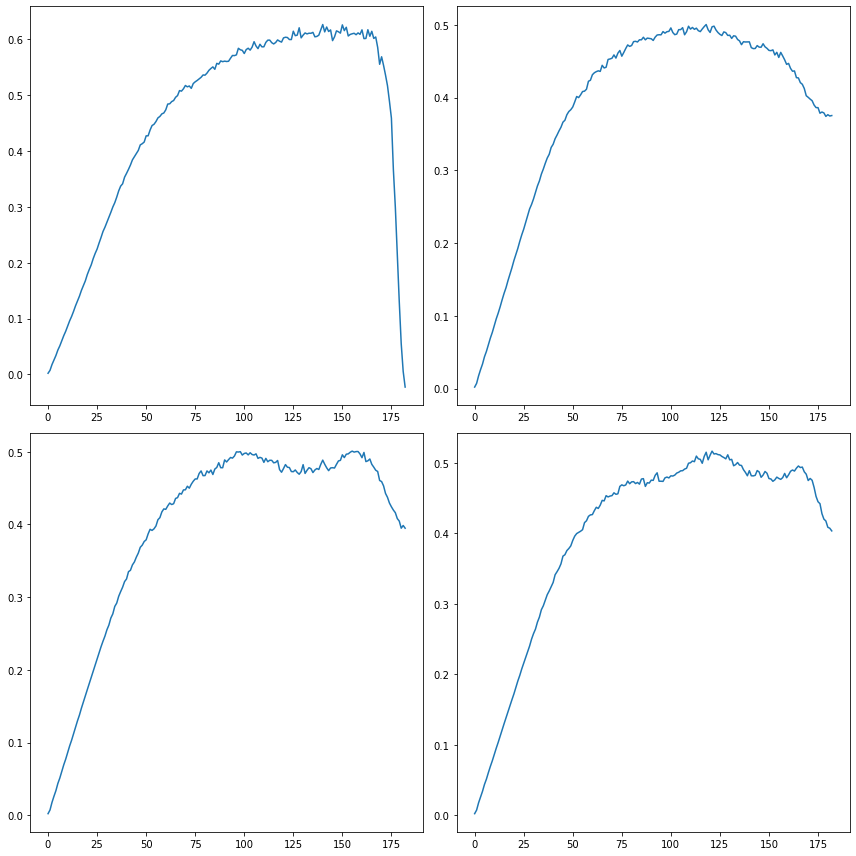

In [8]:
coefficients = torch.load("runs/_debug/coefficients.pt").detach().to("cpu")
plt.subplots(2,2,figsize=(12,12))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(torch.arange(0, coefficients.shape[1]), coefficients[i])
plt.tight_layout()
plt.show()

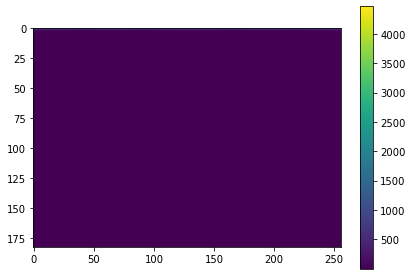

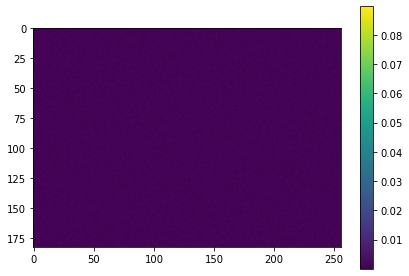

In [13]:
pi = torch.load("runs/_debug/pi.pt").detach().to("cpu").mT
plt.figure()
plt.imshow(pi.abs())
plt.colorbar()
plt.tight_layout()
plt.show()

delta = torch.load("runs/_debug/delta.pt").detach().to("cpu").mT
plt.figure()
plt.imshow(delta.abs())
plt.colorbar()
plt.tight_layout()
plt.show()